**To be noted that cell number 55 where cross-validation is done will take around 2.3 minutes to run.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
housing = pd.read_csv('train.csv')
housing.shape

(1460, 81)

### Cleaning the Data

In [3]:
# Null values analysis:
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

It can be  seen that the features **PoolQC, MiscFeature, Alley, Fence and FireplaceQu** have more than 80% of the data missing and therefore we can drop these columns from the dataset.

In [4]:
to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
housing.drop(to_drop, axis='columns', inplace=True)
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [5]:
# Dropping rows with null values for "LotFrontage":
housing = housing[~housing['LotFrontage'].isnull()]
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

GarageType       6.16
GarageYrBlt      6.16
GarageFinish     6.16
GarageCond       6.16
GarageQual       6.16
BsmtExposure     2.66
BsmtFinType2     2.66
BsmtFinType1     2.58
BsmtCond         2.58
BsmtQual         2.58
MasVnrType       0.50
MasVnrArea       0.50
Electrical       0.08
RoofMatl         0.00
RoofStyle        0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
BldgType         0.00
OverallCond      0.00
LandContour      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
                 ... 
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
3SsnPorch        0.00
BsmtUnfSF        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQua

In [6]:
# Dropping Garage rows:
housing = housing[~housing['GarageType'].isnull()]
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

BsmtFinType2     2.22
BsmtExposure     2.22
BsmtFinType1     2.13
BsmtCond         2.13
BsmtQual         2.13
MasVnrType       0.53
MasVnrArea       0.53
Electrical       0.09
SalePrice        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
Foundation       0.00
ExterQual        0.00
ExterCond        0.00
BsmtUnfSF        0.00
BsmtFinSF1       0.00
YearRemodAdd     0.00
YearBuilt        0.00
OverallCond      0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
                 ... 
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
GarageFinish     0.00
GarageType       0.00
Heating          0.00
Fireplaces       0.00
HeatingQC 

In [7]:
# Dropping Bsmt variabels:
housing = housing[~housing['BsmtFinType2'].isnull()]
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

MasVnrType       0.54
MasVnrArea       0.54
Electrical       0.09
BsmtExposure     0.09
SalePrice        0.00
ExterQual        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
Foundation       0.00
ExterCond        0.00
BsmtUnfSF        0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
YearRemodAdd     0.00
YearBuilt        0.00
OverallCond      0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
                 ... 
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
GarageFinish     0.00
GarageType       0.00
Heating          0.00
Fireplaces       0.00
HeatingQC 

In [8]:
# Dropping MasVnr variables:
housing = housing[~housing['MasVnrType'].isnull()]
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

Electrical       0.09
BsmtExposure     0.09
SalePrice        0.00
ExterQual        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
Foundation       0.00
ExterCond        0.00
BsmtUnfSF        0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
YearRemodAdd     0.00
YearBuilt        0.00
OverallCond      0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
                 ... 
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
GarageFinish     0.00
GarageType       0.00
Heating          0.00
Fireplaces       0.00
HeatingQC 

In [9]:
# Dropping Electrical:
housing = housing[~housing['Electrical'].isnull()]
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

BsmtExposure     0.09
SalePrice        0.00
ExterCond        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
Foundation       0.00
SaleCondition    0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
YearRemodAdd     0.00
YearBuilt        0.00
OverallCond      0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
                 ... 
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
GarageFinish     0.00
GarageType       0.00
HeatingQC        0.00
Fireplaces       0.00
CentralAir

In [10]:
# Dropping Bsmt Exposure:
housing = housing[~housing['BsmtExposure'].isnull()]
round( (housing.isnull().sum(axis='rows'))/ (housing.shape[0]) * 100, 2).sort_values(ascending=False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageType       0.0
HeatingQC        0.0
Fireplaces       0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF     

In [11]:
housing.shape

(1094, 76)

We have lost around 25% of the data but we are still left with around 1100 rows which means that we can proceed further.<br>
Now that we have the data cleaned, let us try to understand the various variables involved in it.

In [12]:
# Looking at the datatypes:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Street           1094 non-null object
LotShape         1094 non-null object
LandContour      1094 non-null object
Utilities        1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null object
Neighborhood     1094 non-null object
Condition1       1094 non-null object
Condition2       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
RoofMatl         1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non

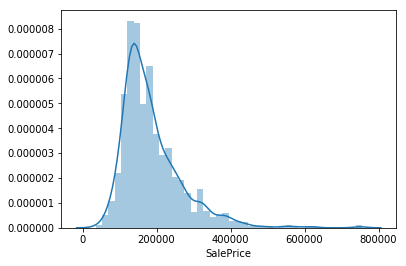

In [13]:
# Selecting all the variables with datatype 'Object':
categorical_var = housing.select_dtypes('object').columns

# Looking at the distribution of the Target variable i.e Price:
sns.distplot(housing['SalePrice'])

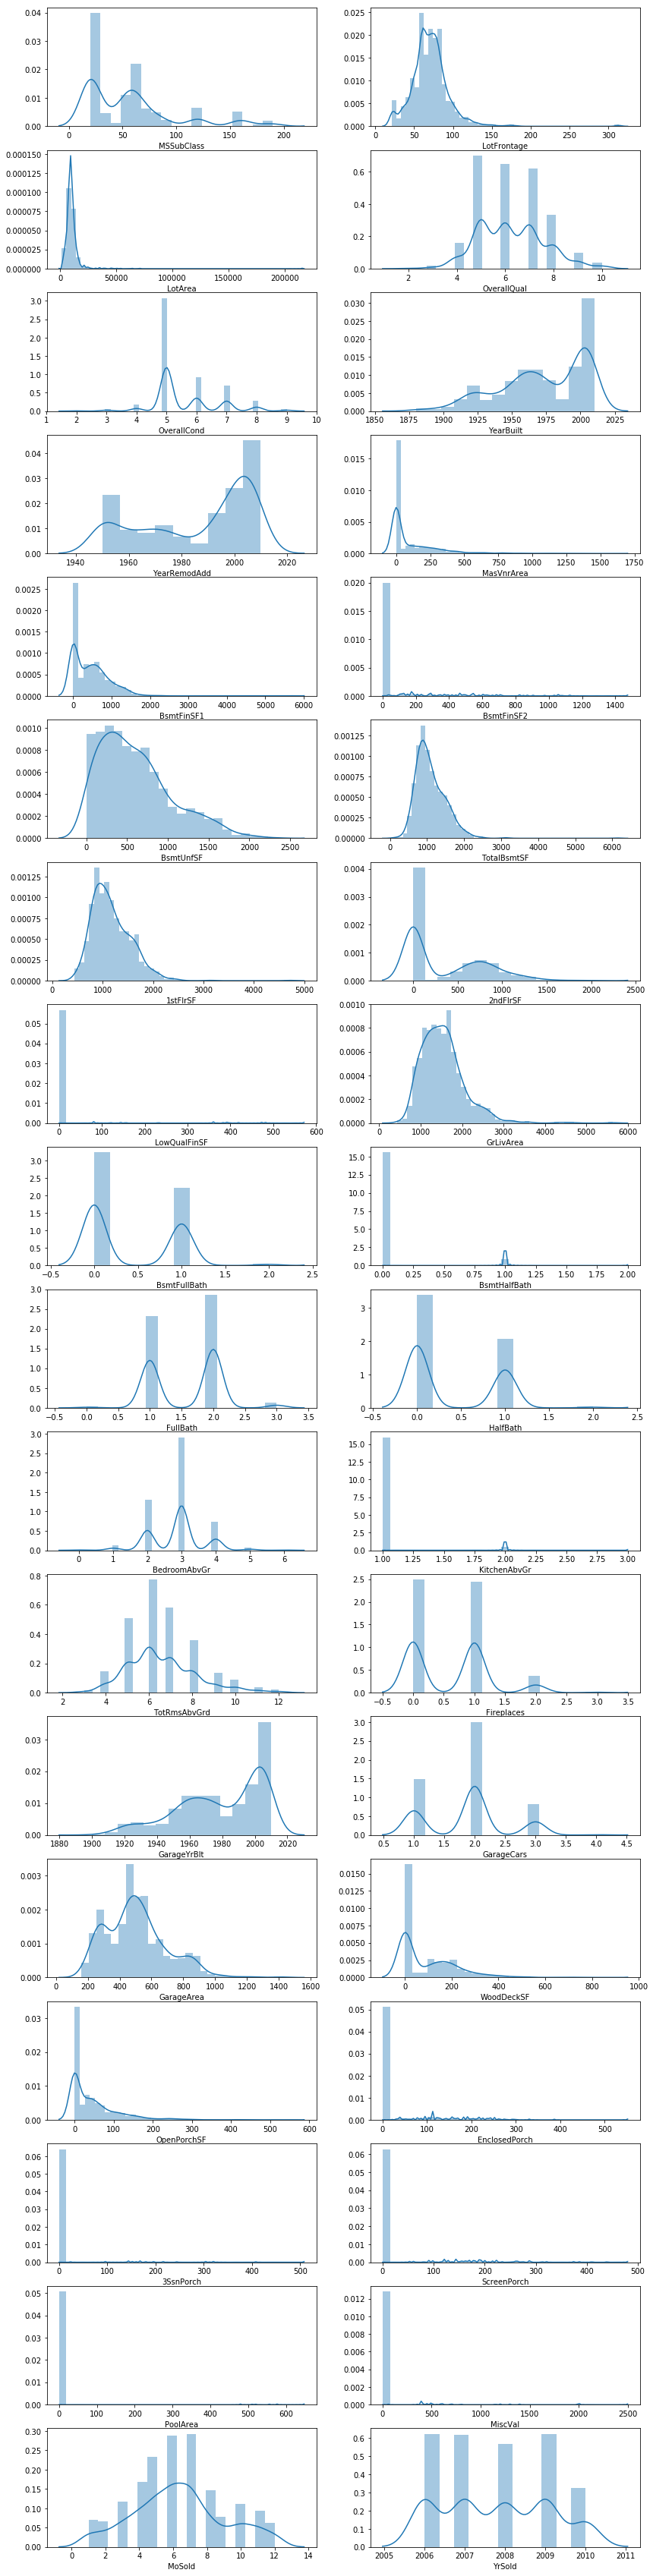

In [14]:
# Storing the numerical values in a list:
numeric_var = list(housing.select_dtypes(['int64', 'int32', 'float64', 'float32']).columns)

# Plotting the distributions of all the variables:
plt.figure(figsize=(14, 65))
for i in range(1, 37):
    plt.subplot(19,2,i)
    sns.distplot(housing[numeric_var[i]])

Some things have popped out from the above plots. The following variables might just be categorical:
- MSSubClass<br>
- OverallQual<br>
- OverallCond<br>
- BsmtFullBath<br>
- FullBath<br>
- HalfBath<br>
- BedroomAbvGr<br>
- TotRmsAbvGrd<br>
- Fireplaces<br>
- GarageCars<br>
- MoSold<br>
- YrSold<br>

**MSSubClass**<br>
This feature identifies the type of dwelling involved in the sale. It has different codes for different kinds of houses such as single storey, multi-storey, etc.<br>
This can be converted to a categorical variable and for that we need to change its datatype to object.

In [15]:
# MSSubClass:
housing['MSSubClass'].value_counts()
# We can see that this can be treated as a categorical variable.

# Changing the datatype from 'numeric' to 'object':
housing['MSSubClass'] = housing['MSSubClass'].astype('object')

print(housing['MSSubClass'].value_counts(normalize=True))

20     0.375686
60     0.207495
50     0.104205
120    0.060329
160    0.048446
70     0.047532
30     0.042962
80     0.033821
90     0.021938
190    0.017367
85     0.011883
75     0.011883
45     0.008227
180    0.005484
40     0.002742
Name: MSSubClass, dtype: float64


**OverallQual and OverallCond**<br>
These are ratings between 1 to 10 for the overall 'material and the finish' and the overall condition of the house. Therefore this can be treated as a categorical variable.<br>
Since there are 10 categories/levels, we can reduce that by clubbing the scores into just 3 buckets.<br>
Let us follow the below mapping:<br>
**Score from 1 to 4 -> Poor <br>
Score from 5 to 7 -> Good <br>
Score from 8 to 10 -> Excellent** <br>

In [16]:
# Looking at the distribution:
print('OverallQual',)
print(housing['OverallQual'].value_counts(normalize=True))
print('\n')
print('OverallCond',)
print(housing['OverallCond'].value_counts(normalize=True))

OverallQual
5     0.266910
6     0.246801
7     0.236746
8     0.127057
4     0.060329
9     0.038391
10    0.014625
3     0.007313
2     0.001828
Name: OverallQual, dtype: float64


OverallCond
5    0.582267
6    0.172761
7    0.132541
8    0.052102
4    0.033821
9    0.011883
3    0.011883
2    0.002742
Name: OverallCond, dtype: float64


In [17]:
# Mapping the scores to the new buckets:
housing['OverallQual'] = housing['OverallQual'].map({1:'Poor', 2:'Poor', 3:'Poor', 4:'Poor',
                                                     5:'Good', 6:'Good', 7:'Good',
                                                     8:'Excellent',9:'Excellent',10:'Excellent'})
print(housing['OverallQual'].value_counts(normalize=True))

housing['OverallCond'] = housing['OverallCond'].map({1:'Poor', 2:'Poor', 3:'Poor', 4:'Poor',
                                                     5:'Good', 6:'Good', 7:'Good',
                                                     8:'Excellent',9:'Excellent',10:'Excellent'})

print(housing['OverallCond'].value_counts(normalize=True))

Good         0.750457
Excellent    0.180073
Poor         0.069470
Name: OverallQual, dtype: float64
Good         0.887569
Excellent    0.063985
Poor         0.048446
Name: OverallCond, dtype: float64


**BsmtFullBath, FullBath, HalfBath**<br>
These are the number of full and half bathrooms in the house on sale.<br>
As can be seen from the below counts, this can be treated as a categorical variable since there are only so many bathrooms a house can have.<br>
Here again, we would not be converting the datatype since the variables are in the correct format for the training of the model.

In [18]:
print('BsmtFullBath')
print(housing['BsmtFullBath'].value_counts())
print('\n')
print('FullBath')
print(housing['FullBath'].value_counts())
print('\n')
print('HalfBath')
print(housing['HalfBath'].value_counts())

BsmtFullBath
0    642
1    441
2     11
Name: BsmtFullBath, dtype: int64


FullBath
2    586
1    476
3     26
0      6
Name: FullBath, dtype: int64


HalfBath
0    675
1    412
2      7
Name: HalfBath, dtype: int64


**MoSold and YrSold**<br>
The month and the year in which the house was sold. This can be converted to a categorical variable.<br>
Also the datatypes here need to be changed to 'object'.
Changing datatype is important because if we keep it as numeric, the model might give a higher weightage to the houses sold in say the 10th month than the houses sold in the 9th month.<br>
The model so obtained will give us wrong predictions on account of misinterpretation of data.

In [19]:
# MoSold:

# Mapping the actual month names:
housing['MoSold']= housing['MoSold'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',
                                          8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})


housing['MoSold'].value_counts(normalize=True)

July         0.169104
June         0.167276
May          0.135283
April        0.096892
August       0.085009
March        0.067642
October      0.064899
November     0.053931
September    0.044790
January      0.040219
February     0.038391
December     0.036563
Name: MoSold, dtype: float64

In [20]:
# YrSold:
housing['YrSold'].value_counts()
# We can see that there are only 5 different years i.e 2006-10 (both inclusive).

# Converting the datatype to object:
housing['YrSold'] = housing['YrSold'].astype('object')

**YearBuilt**<br>
We can calculate the age of the house when it was sold with this variable.<br>
We can simply substract the year built from the year the house was sold.

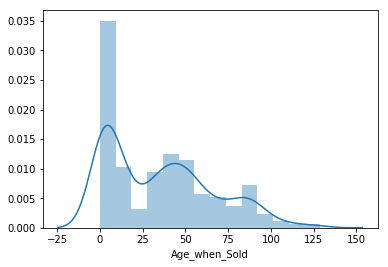

In [21]:
# Changing the datatype back to int:
housing['YrSold'] = housing['YrSold'].astype('int64')

# Calculating the Age_when_Sold:
housing['Age_when_Sold'] = housing['YrSold'] - housing['YearBuilt']

# Changing the datatype of YrSold back to 'object':
housing['YrSold'] = housing['YrSold'].astype('object')

# Distribution of the Age_when_Sold:
sns.distplot(housing['Age_when_Sold'])

In [22]:
# Now we can drop the original variable "YearBuilt" since we already have the information we wanted from it.
# The variable is redundant now.
housing.drop('YearBuilt', axis='columns', inplace=True)

**YearRemodAdd**<br>
We can calculate the "Time since last remodelling" from this variable.

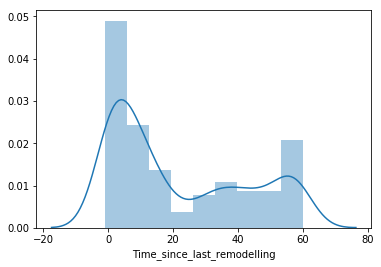

In [23]:
# Changing the datatype back to int:
housing['YrSold'] = housing['YrSold'].astype('int64')

# Calculating the Age_when_Sold:
housing['Time_since_last_remodelling'] = housing['YrSold'] - housing['YearRemodAdd']

# Changing the datatype of YrSold back to 'object':
housing['YrSold'] = housing['YrSold'].astype('object')

# Distribution of the Age_when_Sold:
sns.distplot(housing['Time_since_last_remodelling'])

To be noted that any negative value indicates that the remodelling was done after the house was sold.

In [24]:
# Now we can drop the original variable "YearRemodAdd" since we already have the information we wanted from it.
# The variable is redundant now.
housing.drop('YearRemodAdd', axis='columns', inplace=True)

**GarageYrBlt**<br>
Calculating the "Age_of_Garage" when the house was sold.

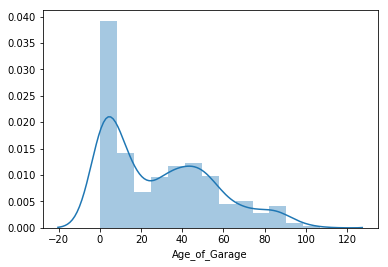

In [25]:
# Changing the datatype back to int:
housing['YrSold'] = housing['YrSold'].astype('int64')

# Calculating the Age_when_Sold:
housing['Age_of_Garage'] = housing['YrSold'] - housing['GarageYrBlt']

# Changing the datatype of YrSold back to 'object':
housing['YrSold'] = housing['YrSold'].astype('object')

# Distribution of the Age_when_Sold:
sns.distplot(housing['Age_of_Garage'])

In [26]:
# Now we can drop the original variable "GarageYrBlt" since we already have the information we wanted from it.
# The variable is redundant now.
housing.drop('GarageYrBlt', axis='columns', inplace=True)

**Central Air**<br>
Since this is a binary variable, let us assign the values to 0 and 1. 

In [27]:
housing['CentralAir'] = housing['CentralAir'].map({'Y':1, 'N':0})
housing['CentralAir'].value_counts()

1    1036
0      58
Name: CentralAir, dtype: int64

Now that we have a removed some variables and also added a few, let us reset the index of our dataframe.

In [28]:
# Resetting the index:
housing = housing.reset_index(drop=True)

Now that we have a clean dataframe to work with, let us proceed with the analysis of categorical variables.
### Analyzing the  categorical variables:

In [29]:
# Selecting categorical variables:
categorical_variables = housing.select_dtypes('object').columns

# Taking the distribution of them:
for i in categorical_variables:
    print(i)
    print(round(housing[i].value_counts(normalize=True), 2))
    print('\n')

MSSubClass
20     0.38
60     0.21
50     0.10
120    0.06
160    0.05
70     0.05
30     0.04
80     0.03
90     0.02
190    0.02
85     0.01
75     0.01
45     0.01
180    0.01
40     0.00
Name: MSSubClass, dtype: float64


MSZoning
RL         0.78
RM         0.16
FV         0.05
RH         0.01
C (all)    0.01
Name: MSZoning, dtype: float64


Street
Pave    1.0
Grvl    0.0
Name: Street, dtype: float64


LotShape
Reg    0.69
IR1    0.28
IR2    0.02
IR3    0.01
Name: LotShape, dtype: float64


LandContour
Lvl    0.91
Bnk    0.04
HLS    0.04
Low    0.01
Name: LandContour, dtype: float64


Utilities
AllPub    1.0
Name: Utilities, dtype: float64


LotConfig
Inside     0.76
Corner     0.17
CulDSac    0.04
FR2        0.03
FR3        0.00
Name: LotConfig, dtype: float64


LandSlope
Gtl    0.96
Mod    0.04
Sev    0.00
Name: LandSlope, dtype: float64


Neighborhood
NAmes      0.16
CollgCr    0.11
OldTown    0.09
Somerst    0.07
NridgHt    0.07
Edwards    0.06
Gilbert    0.04
NWAmes     0.04
S

From the above output, we can see that there are multiple variables, where there is a great deal of data imbalance.<br>
However, it is hard to interpret in tabular form.<br>
Let us plot these variables to get a clear picture of the magnitude of imbalance.

In [30]:
# Creating a list of high-imbalance variables:
var_low_variance = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 
                    'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 
                    'Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 
                    'PavedDrive', 'SaleType','SaleCondition', 'OverallCond']

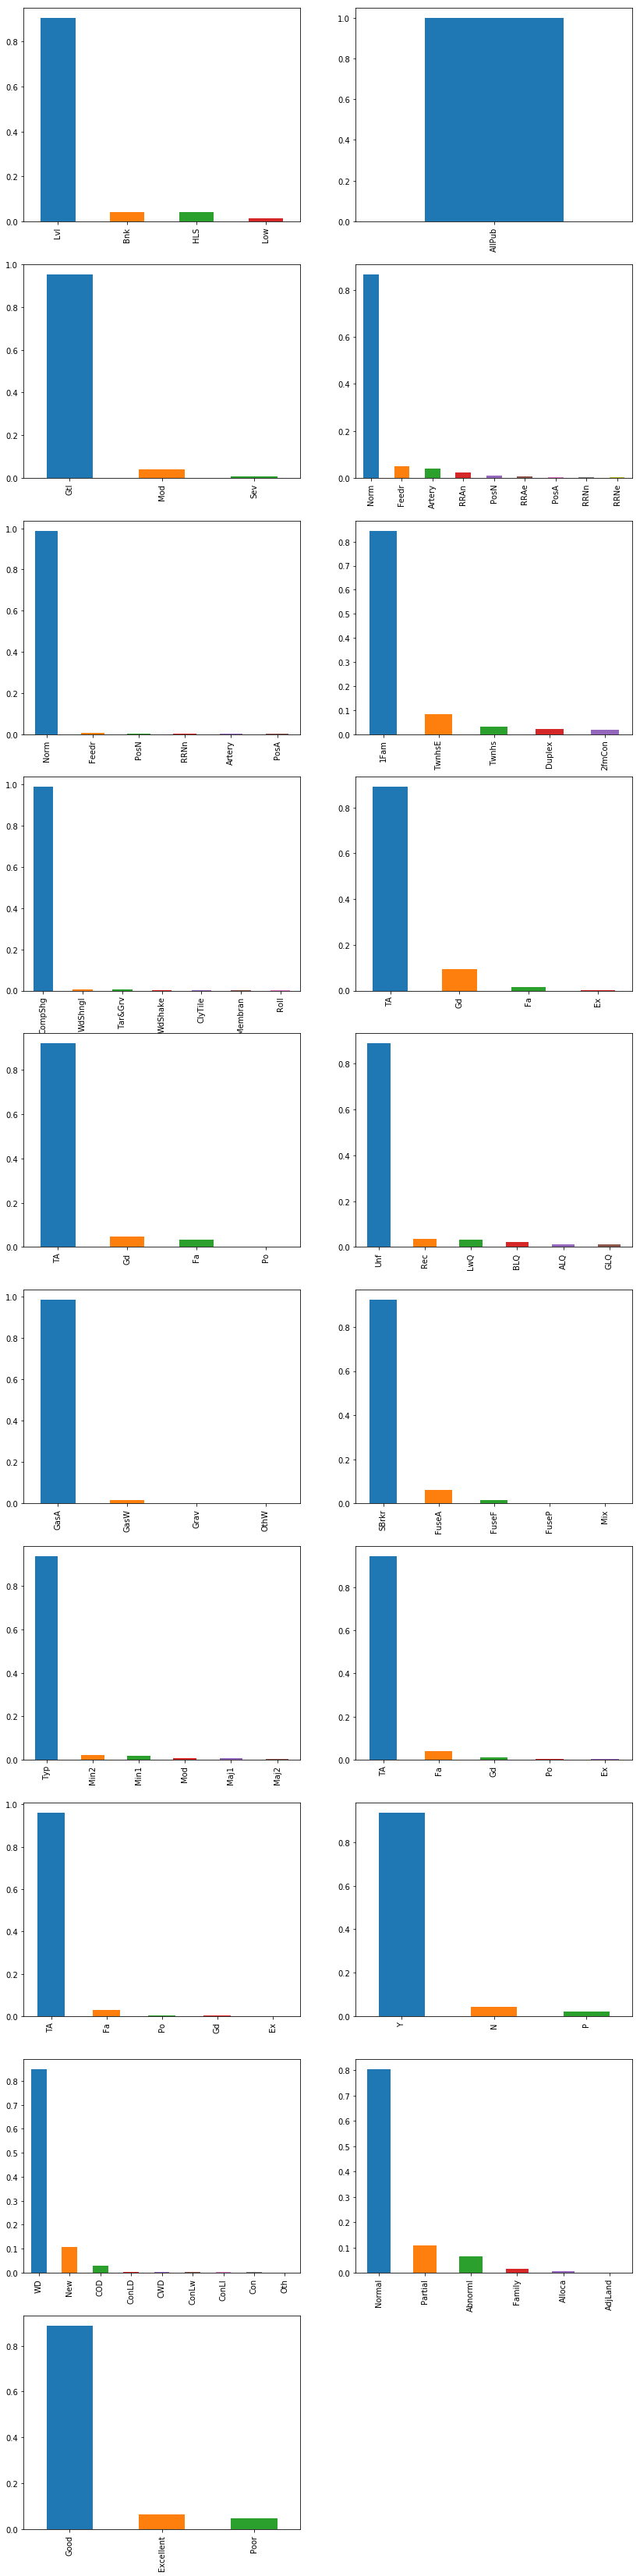

In [31]:
plt.figure(figsize=(14, 120))
for i in range(1, len(var_low_variance)):
    plt.subplot(20,2,i)
    housing[var_low_variance[i]].value_counts(normalize=True).plot(kind='bar')

From the above plots, we can see that all these variables will provide no information to the model and therefore it is safe to drop them since they are devoid of information.

In [32]:
# Dropping the low variance columns:
housing.drop(var_low_variance, axis='columns', inplace=True)
housing.shape

(1094, 56)

Now that we have further cleaned the data, let us proceed with the analysis of the correlation between these variables.
### Correlation Matrix:

In [33]:
# Numeric variables:
numeric_var = list(housing.select_dtypes(['int32','int64','float32','float64']))
print(len(numeric_var))

# Categorical variables:
categorical_var = list(housing.select_dtypes('object'))
print(len(categorical_var))

34
22


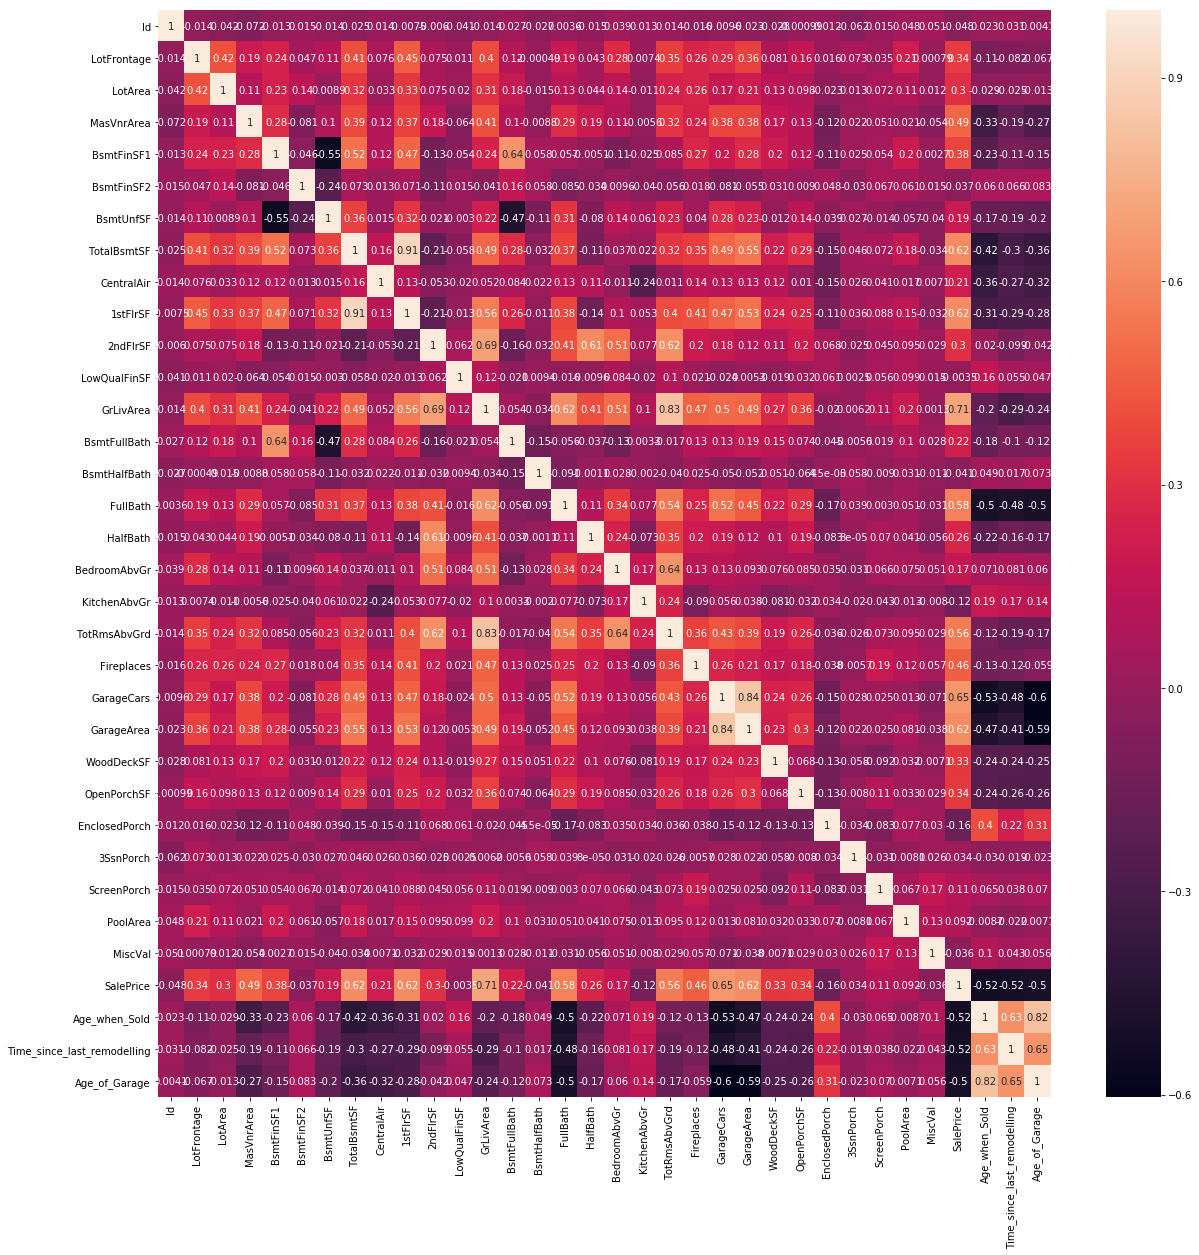

In [34]:
plt.figure(figsize=(20,20))
corr = housing[numeric_var].corr()
sns.heatmap(corr, annot=True)

We can see that there are a great deal of variables which are highly correlated with each other.<br>
Multicollinearity will be an issue for this problem and we'll need to address it.

### Creating Dummy Variables:

In [35]:
# Generating a dataframe of all dummy variables:
categorical_var = housing.select_dtypes(include=['object'])

house_dummies = pd.get_dummies(categorical_var, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
# drop categorical variables 
housing = housing.drop(list(categorical_var.columns), axis=1)
housing.shape

(1094, 34)

In [37]:
# Concatenating dummy variables with the main dataframe:
housing = pd.concat([housing, house_dummies], axis=1)
housing.shape

(1094, 174)

####  Splitting the Data into Train and Test:

In [38]:
# Importing the libraries for splitting the data:
from sklearn.model_selection import train_test_split

In [39]:
# Splitting the data:
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(765, 174)
(329, 174)


#### Scaling the data:

In [40]:
df_train.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,...,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,...,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,737.669281,72.027451,10215.768627,108.393464,447.623529,51.273203,606.091503,1104.988235,0.947712,1180.633987,...,0.166013,0.061438,0.138562,0.048366,0.066667,0.048366,0.222222,0.207843,0.228758,0.122876
std,416.325074,25.330910,8858.447464,181.782307,473.556920,169.912512,445.402262,422.578304,0.222752,387.393389,...,0.372336,0.240289,0.345715,0.214679,0.249607,0.214679,0.416012,0.406029,0.420308,0.328509
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,438.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,399.000000,60.000000,7800.000000,0.000000,0.000000,0.000000,270.000000,822.000000,1.000000,894.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,736.000000,70.000000,9591.000000,0.000000,388.000000,0.000000,508.000000,1026.000000,1.000000,1105.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.000000,82.000000,11409.000000,171.000000,704.000000,0.000000,846.000000,1350.000000,1.000000,1414.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1459.000000,313.000000,215245.000000,1378.000000,5644.000000,1474.000000,2336.000000,6110.000000,1.000000,4692.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the columns are on very different scales and therefore it would be good to rescale the data so that the scales become comparable.<br>
This will also enhance the interpretability of the model made on this data.

In [41]:
# Let us first remove the "Id" variable from the dataset and then proceed with the rescaling.
df_train.drop('Id', axis='columns', inplace=True)

In [42]:
# Splitting train data into X and y:
y_train = df_train.pop('SalePrice')
X_train = df_train
print(y_train.shape)
print(X_train.shape)

(765,)
(765, 172)


In [43]:
# Dropping 'Id' variable from the test data:
df_test.drop('Id', axis='columns', inplace=True)

# Splitting test data into X and y:
y_test = df_test.pop('SalePrice')
X_test = df_test
print(y_test.shape)
print(X_test.shape)

(329,)
(329, 172)


In [44]:
# Importing the library for Scaling:
from sklearn.preprocessing import MinMaxScaler

# Instantiating the scaler variable:
scaler = MinMaxScaler()

# Storing the column names before scaling:
col_names = X_train.columns

# Scaling the dataframe:
X_train = scaler.fit_transform(X_train)

In [45]:
X_train = pd.DataFrame(X_train)
X_train.columns = col_names
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.339041,0.066891,0.000000,0.000000,0.000000,0.461901,0.162198,1.0,0.150682,0.406780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.167808,0.034761,0.000000,0.053154,0.000000,0.327483,0.159867,1.0,0.112130,0.348668,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.167808,0.046199,0.066763,0.040043,0.339213,0.082192,0.135387,1.0,0.112835,0.370460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.133562,0.044404,0.000000,0.000000,0.000000,0.206336,0.062781,0.0,0.184062,0.334625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.219178,0.057491,0.127721,0.080439,0.000000,0.134418,0.110408,1.0,0.175835,0.387409,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,...,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,0.174752,0.041673,0.078660,0.079310,0.034785,0.259457,0.166526,0.947712,0.174573,0.171419,...,0.166013,0.061438,0.138562,0.048366,0.066667,0.048366,0.222222,0.207843,0.228758,0.122876
std,0.086750,0.041405,0.131917,0.083904,0.115273,0.190669,0.070371,0.222752,0.091066,0.211262,...,0.372336,0.240289,0.345715,0.214679,0.249607,0.214679,0.416012,0.406029,0.420308,0.328509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.030382,0.000000,0.000000,0.000000,0.115582,0.119400,1.000000,0.107193,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.167808,0.038753,0.000000,0.068746,0.000000,0.217466,0.153372,1.000000,0.156794,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.208904,0.047250,0.124093,0.124734,0.000000,0.362158,0.207327,1.000000,0.229431,0.353027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see from the above description, all the columns have been scaled between 0 and 1.<br>
Let us also scale the test dataset.

In [47]:
# Scaling the test data:
X_test = scaler.transform(X_test)

# Taking a look:
# Taking the column names:
X_test = pd.DataFrame(X_test)
X_test.columns = col_names
X_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,MoSold_June,MoSold_March,MoSold_May,MoSold_November,MoSold_October,MoSold_September,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,...,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.160314,0.040377,0.082188,0.079645,0.021202,0.259493,0.163521,0.945289,0.169239,0.175535,...,0.170213,0.082067,0.127660,0.066869,0.060790,0.036474,0.227964,0.203647,0.218845,0.106383
std,0.076164,0.030255,0.152492,0.081150,0.087924,0.191574,0.066631,0.227762,0.091317,0.216358,...,0.376392,0.274885,0.334219,0.250176,0.239309,0.187752,0.420158,0.403323,0.414093,0.308797
min,0.000000,0.001384,0.000000,0.000000,0.000000,0.000000,0.026478,0.000000,0.009873,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109589,0.027577,0.000000,0.000000,0.000000,0.117295,0.116403,1.000000,0.103667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.157534,0.036551,0.000000,0.066265,0.000000,0.238014,0.147710,1.000000,0.152327,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.202055,0.046498,0.127721,0.129695,0.000000,0.362158,0.201665,1.000000,0.226610,0.354479,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.523973,0.324668,1.161103,0.400425,0.721167,0.921661,0.505079,1.000000,0.634697,0.880387,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building:
Let us try building a Simple Linear Regression model.

In [48]:
import statsmodels.api as sm

In [49]:
# importing the libraries for feature selection:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Since we have 172 columns in the dataset, feature selection is of utmost importance.<br>
To get started with it, we will try to choose features ranging from 5 to 40.<br>
The number 40 has been chosen with the reasoning that no more than 40 variables will be allowed in the model otherwise there will be a risk of overfitting and also the interpretability of the model will suffer.<br>
<br>
What we are doing is that we will create models based on different RFE's and then look at the test and the train R2 scores. This will give us an understanding of the performance of the model with respect to the number of features used.

In [50]:
# Building Simple Linear Regression model using multiple values of features in RFE:

R2_train_list = []
R2_test_list =[]

# Defining the number of features to use:
num_of_features = list(range(5, 41))

for i in num_of_features:
# Defining the model
    lm = LinearRegression()
    lm.fit(X_train, y_train)

# Fitting RFE on the model so obtained:
    rfe = RFE(lm, n_features_to_select = i)
    rfe = rfe.fit(X_train, y_train)

# Calculating y_pred:
    y_train_pred = rfe.predict(X_train)
    y_test_pred = rfe.predict(X_test)
    
# Calcualting R2 for the model
    r2_train = r2_score(y_true = y_train, y_pred = y_train_pred)
    r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
    R2_train_list.append(r2_train)
    R2_test_list.append(r2_test)

In [51]:
print(R2_train_list)
print('\n')
print(R2_test_list)

[0.6953251414040658, 0.6964874448082943, 0.7046382375116631, 0.7057983882838015, 0.7067810130112803, 0.7250753592709411, 0.7766605922987028, 0.7843973074450562, 0.7984901747341574, 0.7985016367299025, 0.7985434626603267, 0.7985721142244349, 0.8004437433107817, 0.8129655799688467, 0.8219603178605636, 0.8222738660462926, 0.8237128730659177, 0.8254101171751594, 0.8307056566721636, 0.8314952077442375, 0.8327117210860399, 0.8420934200488839, 0.8436962918595768, 0.8437630271323138, 0.8460022290140748, 0.8496663029586944, 0.8501840846426929, 0.8502163782966401, 0.8506096443588198, 0.8547510918176936, 0.8548723586206841, 0.8590116699043782, 0.8590409530930074, 0.8596808877453286, 0.8599539079266796, 0.8605327204320079]


[0.6258605596520229, 0.6292249454654044, 0.6296284572008424, 0.6296080960147931, 0.6319498744835035, 0.6464796640213185, 0.6497477233773282, 0.6589145195711715, 0.6509635538885438, 0.648829361681982, 0.6472543819367063, 0.6438696078581301, 0.6252505062152895, 0.657378397124779

In [52]:
# Creating a dataframe so that the scores are readable:
RFE_train_test_score = pd.DataFrame({'Number of features': num_of_features, 
                                    'R2_train' : R2_train_list, 'R2_test' : R2_test_list})
# Difference in the score:
RFE_train_test_score['Diff'] = RFE_train_test_score['R2_train'] - RFE_train_test_score['R2_test']

RFE_train_test_score

,Number of features,R2_train,R2_test,Diff
0,5,0.695325,0.625861,0.069465
1,6,0.696487,0.629225,0.067262
2,7,0.704638,0.629628,0.075010
3,8,0.705798,0.629608,0.076190
4,9,0.706781,0.631950,0.074831
5,10,0.725075,0.646480,0.078596
6,11,0.776661,0.649748,0.126913
7,12,0.784397,0.658915,0.125483
8,13,0.798490,0.650964,0.147527
9,14,0.798502,0.648829,0.149672


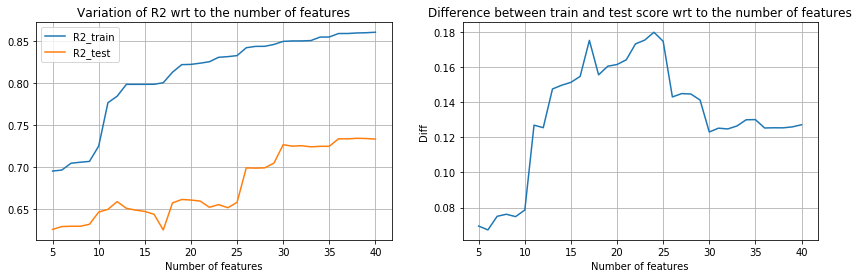

In [53]:
# Plotting the r2_scores:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot('Number of features', 'R2_train', data=RFE_train_test_score) # Blue line
plt.plot('Number of features', 'R2_test', data=RFE_train_test_score) # Orange Line
plt.xlabel('Number of features')
plt.title('Variation of R2 wrt to the number of features')
plt.grid()
plt.legend(loc='upper left')
plt.subplot(122)
sns.lineplot('Number of features', 'Diff', data=RFE_train_test_score)
plt.title('Difference between train and test score wrt to the number of features')
plt.grid()

From the above plot we can see that there are close to 30 variables where the model preformance is good.<br>
let us also do cross-validation and try to find the optimal number of features again.
#### Finding the number of optimal features using Cross Validation:

In [54]:
# importing the required libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [55]:
# Creating a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Specify range of hyperparameters to tune:
# Let us take the number of parameters to be from 1 to 40.
hyper_params = [{'n_features_to_select': list(range(1, 41))}]


# Grid search:
# Specifying the model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             


model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [56]:
# Converting the cross validation results to a dataframe:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.694371,0.007999,0.000479,0.000014,1,{'n_features_to_select': 1},0.411356,-0.710554,0.450631,0.368631,...,0.203030,0.458707,40,0.336440,0.463043,0.535913,0.365752,0.343164,0.408862,0.078099
1,0.688602,0.008017,0.000512,0.000037,2,{'n_features_to_select': 2},0.652868,-0.749590,0.476362,0.150918,...,0.243054,0.531277,32,0.535407,0.735081,0.577067,0.389838,0.558799,0.559238,0.110003
2,0.686741,0.007186,0.000479,0.000002,3,{'n_features_to_select': 3},0.671545,-1.043068,0.482329,0.449640,...,0.254331,0.656685,31,0.580586,0.741173,0.580897,0.578616,0.596900,0.615634,0.063113
3,0.682813,0.006222,0.000496,0.000014,4,{'n_features_to_select': 4},0.720802,-1.261176,0.448780,0.447750,...,0.225077,0.755039,36,0.671777,0.748444,0.596851,0.583529,0.677866,0.655693,0.060038
4,0.694980,0.020187,0.000489,0.000007,5,{'n_features_to_select': 5},0.722769,-1.455080,0.617338,0.442180,...,0.219448,0.844801,38,0.672477,0.772152,0.691914,0.585321,0.680473,0.680467,0.059420


In [57]:
# Adding a new column Difference between the Mean Train score and Mean Test Score:
cv_results['Difference'] = cv_results['mean_train_score'] - cv_results['mean_test_score']
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,Difference
0,0.694371,0.007999,0.000479,0.000014,1,{'n_features_to_select': 1},0.411356,-0.710554,0.450631,0.368631,...,0.458707,40,0.336440,0.463043,0.535913,0.365752,0.343164,0.408862,0.078099,0.205832
1,0.688602,0.008017,0.000512,0.000037,2,{'n_features_to_select': 2},0.652868,-0.749590,0.476362,0.150918,...,0.531277,32,0.535407,0.735081,0.577067,0.389838,0.558799,0.559238,0.110003,0.316184
2,0.686741,0.007186,0.000479,0.000002,3,{'n_features_to_select': 3},0.671545,-1.043068,0.482329,0.449640,...,0.656685,31,0.580586,0.741173,0.580897,0.578616,0.596900,0.615634,0.063113,0.361304
3,0.682813,0.006222,0.000496,0.000014,4,{'n_features_to_select': 4},0.720802,-1.261176,0.448780,0.447750,...,0.755039,36,0.671777,0.748444,0.596851,0.583529,0.677866,0.655693,0.060038,0.430616
4,0.694980,0.020187,0.000489,0.000007,5,{'n_features_to_select': 5},0.722769,-1.455080,0.617338,0.442180,...,0.844801,38,0.672477,0.772152,0.691914,0.585321,0.680473,0.680467,0.059420,0.461019


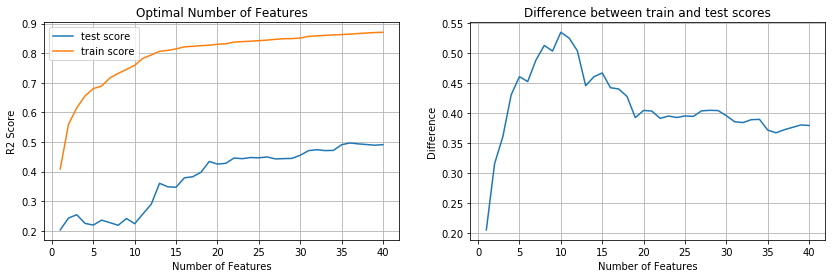

In [58]:
# plotting cv results
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.grid()

plt.subplot(122)
plt.plot(cv_results['param_n_features_to_select'], cv_results['Difference'])
plt.xlabel('Number of Features')
plt.ylabel('Difference')
plt.title('Difference between train and test scores')
plt.grid()

As can be seen from the above plots, the optimal number of features using Cross-Validation comes out to be between 25 to 30.<br>
Let us use 30 features (as we got from RFE previously) to build our Simple Linear Regression Model, on that we can apply VIF and p-value analysis to further get to a better model.

In [59]:
# importing the required libraries:
import statsmodels.api as sm

In [60]:
# Using RFE to get 16 variables:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Fitting RFE on the model so obtained:
rfe = RFE(lm, n_features_to_select = 30)
rfe = rfe.fit(X_train, y_train)

In [61]:
# Getting the list of the features selected:
rfe_df = pd.DataFrame({'Feature' : X_train.columns, 'Support':rfe.support_, 'Ranking':rfe.ranking_})

rfe_df = rfe_df[rfe_df['Support']==True]
rfe_df = rfe_df.reset_index(drop=True)
rfe_df

,Feature,Support,Ranking
0,LotArea,True,1
1,BsmtUnfSF,True,1
2,1stFlrSF,True,1
3,2ndFlrSF,True,1
4,GrLivArea,True,1
5,FullBath,True,1
6,KitchenAbvGr,True,1
7,GarageCars,True,1
8,GarageArea,True,1
9,MSSubClass_75,True,1


In [62]:
# Resetting the index:
y_train = y_train.reset_index(drop=True)

In [63]:
# Using statsmodels to make the linear model:
X_train_model = sm.add_constant(X_train[rfe_df['Feature']])
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          1.20e-278
Time:                        12:40:34   Log-Likelihood:                -9024.0
No. Observations:                 765   AIC:                         1.811e+04
Df Residuals:                     734   BIC:                         1.825e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.238e+05   1.06e+04     21.190      0.000    2.03e+05    2.45e+05
LotArea               2.435e+05   3.47e+04      7.010      0.000    1.75e+05    3.12e+05
BsmtUnfSF            -3.744e+04   7050.224     -5.310      0.000   -5.13e+04   -2.36e+04
1stFlrSF               3.15e+05   1.86e+05      1.695      0.090   -4.98e+04     6.8e+05
2ndFlrSF              1.123e+05      9e+04      1.248      0.212   -6.44e+04    2.89e+05
GrLivArea            -5.137e+04   2.27e+05     -0.227      0.821   -4.96e+05    3.93e+05
FullBath               3.99e+04   1.07e+04      3.720      0.000    1.88e+04     6.1e+04
KitchenAbvGr         -8.371e+04   1.36e+04     -6.162      0.000    -1.1e+05    -5.7e+04
GarageCars            7.024e+04   1.13e+04      6.209      0.000     4.8e+04    9.24e+04
GarageArea           -3.935e+04   1.57e+04     -2.512      0.012   -7.01e+04   -8596.074
MSSubClass_75        -5.542e+04   3.99e+04     -1.390      0.165   -1.34e+05    2.28e+04
LotShape_IR3         -8.603e+04   1.55e+04     -5.557      0.000   -1.16e+05   -5.56e+04
Neighborhood_NoRidge  5.586e+04   8292.032      6.737      0.000    3.96e+04    7.21e+04
Neighborhood_StoneBr  4.444e+04   9980.406      4.453      0.000    2.48e+04     6.4e+04
HouseStyle_2.5Fin     1.947e+05   5.79e+04      3.364      0.001     8.1e+04    3.08e+05
HouseStyle_2.5Unf     4.641e+04   3.79e+04      1.225      0.221    -2.8e+04    1.21e+05
OverallQual_Good     -2.728e+04   4579.125     -5.958      0.000   -3.63e+04   -1.83e+04
OverallQual_Poor     -4.015e+04   7098.366     -5.657      0.000   -5.41e+04   -2.62e+04
Exterior1st_BrkComm  -5.721e+04    3.3e+04     -1.734      0.083   -1.22e+05    7547.327
Exterior1st_ImStucc  -9.968e+04   3.66e+04     -2.720      0.007   -1.72e+05   -2.77e+04
Exterior1st_Stucco   -2.635e+04   9910.729     -2.659      0.008   -4.58e+04   -6893.070
Exterior2nd_ImStucc   4.015e+04   1.51e+04      2.657      0.008    1.05e+04    6.98e+04
ExterQual_Fa         -7.504e+04   1.93e+04     -3.895      0.000   -1.13e+05   -3.72e+04
ExterQual_Gd         -3.119e+04   8045.672     -3.877      0.000    -4.7e+04   -1.54e+04
ExterQual_TA         -4.657e+04   8908.316     -5.227      0.000   -6.41e+04   -2.91e+04
BsmtQual_Fa          -5.058e+04   9219.390     -5.486      0.000   -6.87e+04   -3.25e+04
BsmtQual_Gd          -4.177e+04   5354.748     -7.801      0.000   -5.23e+04   -3.13e+04
BsmtQual_TA          -4.712e+04   6176.383     -7.629      0.000   -5.92e+04    -3.5e+04
KitchenQual_Fa       -3.838e+04   1.01e+04     -3.814      0.000   -5.81e+04   -1.86e+04
KitchenQual_Gd       -2.604e+04   6157.469     -4.230      0.000   -3.81e+04    -1.4e+04
KitchenQual_TA       -3.571e+04   6678.910     -5.347      0.000   -4.88e+04   -2.26e+04
=========================================================

We can see that the R2 score is 0.85, but there are some insignificant features in the model.<br>
Let us also calculate the VIF and then we can decide which features to remove.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending = False)
vif

,Features,VIF
5,GrLivArea,362.46
4,2ndFlrSF,256.80
3,1stFlrSF,203.47
0,const,79.37
24,ExterQual_TA,13.70
23,ExterQual_Gd,10.71
10,MSSubClass_75,10.25
15,HouseStyle_2.5Unf,9.27
30,KitchenQual_TA,7.90
27,BsmtQual_TA,6.71


As can be seen, the variable **GrLivArea** has a high VIF and a high p-value.<br>
Let us remove it.

In [65]:
# Dropping 'GrLivArea' from the model:
X_train_model.pop('GrLivArea')
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          1.02e-279
Time:                        12:40:34   Log-Likelihood:                -9024.0
No. Observations:                 765   AIC:                         1.811e+04
Df Residuals:                     735   BIC:                         1.825e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.237e+05   1.05e+04     21.207      0.000    2.03e+05    2.44e+05
LotArea               2.435e+05   3.47e+04      7.015      0.000    1.75e+05    3.12e+05
BsmtUnfSF            -3.747e+04   7044.046     -5.320      0.000   -5.13e+04   -2.36e+04
1stFlrSF              2.732e+05    2.1e+04     13.010      0.000    2.32e+05    3.14e+05
2ndFlrSF              9.195e+04   7674.743     11.981      0.000    7.69e+04    1.07e+05
FullBath              3.995e+04   1.07e+04      3.728      0.000    1.89e+04     6.1e+04
KitchenAbvGr         -8.367e+04   1.36e+04     -6.163      0.000    -1.1e+05    -5.7e+04
GarageCars            7.016e+04   1.13e+04      6.209      0.000     4.8e+04    9.23e+04
GarageArea           -3.927e+04   1.56e+04     -2.510      0.012      -7e+04   -8551.400
MSSubClass_75         -5.54e+04   3.98e+04     -1.390      0.165   -1.34e+05    2.28e+04
LotShape_IR3         -8.606e+04   1.55e+04     -5.563      0.000   -1.16e+05   -5.57e+04
Neighborhood_NoRidge  5.583e+04   8285.658      6.739      0.000    3.96e+04    7.21e+04
Neighborhood_StoneBr  4.444e+04   9973.942      4.455      0.000    2.49e+04     6.4e+04
HouseStyle_2.5Fin      1.89e+05   5.22e+04      3.621      0.000    8.65e+04    2.91e+05
HouseStyle_2.5Unf     4.641e+04   3.79e+04      1.225      0.221   -2.79e+04    1.21e+05
OverallQual_Good     -2.729e+04   4576.164     -5.963      0.000   -3.63e+04   -1.83e+04
OverallQual_Poor     -4.011e+04   7091.359     -5.656      0.000    -5.4e+04   -2.62e+04
Exterior1st_BrkComm  -5.715e+04    3.3e+04     -1.734      0.083   -1.22e+05    7570.830
Exterior1st_ImStucc  -9.967e+04   3.66e+04     -2.722      0.007   -1.72e+05   -2.78e+04
Exterior1st_Stucco   -2.634e+04   9904.248     -2.660      0.008   -4.58e+04   -6896.613
Exterior2nd_ImStucc   4.017e+04   1.51e+04      2.660      0.008    1.05e+04    6.98e+04
ExterQual_Fa         -7.496e+04   1.92e+04     -3.895      0.000   -1.13e+05   -3.72e+04
ExterQual_Gd         -3.118e+04   8040.399     -3.878      0.000    -4.7e+04   -1.54e+04
ExterQual_TA         -4.652e+04   8900.386     -5.227      0.000    -6.4e+04    -2.9e+04
BsmtQual_Fa          -5.058e+04   9213.435     -5.490      0.000   -6.87e+04   -3.25e+04
BsmtQual_Gd          -4.177e+04   5351.268     -7.805      0.000   -5.23e+04   -3.13e+04
BsmtQual_TA          -4.715e+04   6170.282     -7.642      0.000   -5.93e+04    -3.5e+04
KitchenQual_Fa       -3.839e+04   1.01e+04     -3.817      0.000   -5.81e+04   -1.86e+04
KitchenQual_Gd       -2.604e+04   6153.434     -4.231      0.000   -3.81e+04    -1.4e+04
KitchenQual_TA       -3.575e+04   6672.419     -5.358      0.000   -4.89e+04   -2.27e+04
==============================================================================
Omnibus:                      283.706   Durbin-Watson:             

In [66]:
# Calculating the VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending = False)
vif

,Features,VIF
0,const,79.30
23,ExterQual_TA,13.70
22,ExterQual_Gd,10.71
9,MSSubClass_75,10.25
14,HouseStyle_2.5Unf,9.27
29,KitchenQual_TA,7.89
26,BsmtQual_TA,6.70
28,KitchenQual_Gd,6.61
25,BsmtQual_Gd,4.97
7,GarageCars,4.24


Now, we can see that the feature **MSSubClass_75** has a high VIF and a high p-value.<br>
Let us drop it.

In [67]:
X_train_model.pop('MSSubClass_75')
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          2.17e-280
Time:                        12:40:34   Log-Likelihood:                -9025.0
No. Observations:                 765   AIC:                         1.811e+04
Df Residuals:                     736   BIC:                         1.824e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.244e+05   1.05e+04     21.289      0.000    2.04e+05    2.45e+05
LotArea               2.439e+05   3.47e+04      7.021      0.000    1.76e+05    3.12e+05
BsmtUnfSF             -3.74e+04   7048.298     -5.306      0.000   -5.12e+04   -2.36e+04
1stFlrSF              2.739e+05    2.1e+04     13.044      0.000    2.33e+05    3.15e+05
2ndFlrSF              9.234e+04   7674.597     12.031      0.000    7.73e+04    1.07e+05
FullBath              3.908e+04   1.07e+04      3.650      0.000    1.81e+04    6.01e+04
KitchenAbvGr         -8.104e+04   1.35e+04     -6.025      0.000   -1.07e+05   -5.46e+04
GarageCars            6.961e+04   1.13e+04      6.161      0.000    4.74e+04    9.18e+04
GarageArea           -3.996e+04   1.57e+04     -2.553      0.011   -7.07e+04   -9232.368
LotShape_IR3         -8.612e+04   1.55e+04     -5.563      0.000   -1.17e+05   -5.57e+04
Neighborhood_NoRidge  5.584e+04   8290.910      6.735      0.000    3.96e+04    7.21e+04
Neighborhood_StoneBr  4.444e+04   9980.265      4.452      0.000    2.48e+04     6.4e+04
HouseStyle_2.5Fin     1.337e+05   3.38e+04      3.955      0.000    6.73e+04       2e+05
HouseStyle_2.5Unf    -2984.2132   1.31e+04     -0.227      0.820   -2.88e+04    2.28e+04
OverallQual_Good     -2.731e+04   4579.036     -5.964      0.000   -3.63e+04   -1.83e+04
OverallQual_Poor     -4.068e+04   7083.888     -5.743      0.000   -5.46e+04   -2.68e+04
Exterior1st_BrkComm  -5.728e+04    3.3e+04     -1.737      0.083   -1.22e+05    7474.620
Exterior1st_ImStucc   -9.94e+04   3.66e+04     -2.713      0.007   -1.71e+05   -2.75e+04
Exterior1st_Stucco   -2.616e+04   9909.666     -2.640      0.008   -4.56e+04   -6704.537
Exterior2nd_ImStucc   4.019e+04   1.51e+04      2.659      0.008    1.05e+04    6.99e+04
ExterQual_Fa         -6.441e+04   1.77e+04     -3.639      0.000   -9.92e+04   -2.97e+04
ExterQual_Gd         -3.088e+04   8042.614     -3.840      0.000   -4.67e+04   -1.51e+04
ExterQual_TA         -4.631e+04   8904.759     -5.201      0.000   -6.38e+04   -2.88e+04
BsmtQual_Fa          -5.124e+04   9206.814     -5.566      0.000   -6.93e+04   -3.32e+04
BsmtQual_Gd          -4.194e+04   5353.244     -7.834      0.000   -5.24e+04   -3.14e+04
BsmtQual_TA           -4.75e+04   6169.180     -7.700      0.000   -5.96e+04   -3.54e+04
KitchenQual_Fa        -3.94e+04      1e+04     -3.926      0.000   -5.91e+04   -1.97e+04
KitchenQual_Gd       -2.616e+04   6156.742     -4.248      0.000   -3.82e+04   -1.41e+04
KitchenQual_TA         -3.6e+04   6674.252     -5.394      0.000   -4.91e+04   -2.29e+04
==============================================================================
Omnibus:                      284.281   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12753.85

In [68]:
# Calculating the VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending = False)
vif

,Features,VIF
0,const,79.10
22,ExterQual_TA,13.69
21,ExterQual_Gd,10.70
28,KitchenQual_TA,7.89
25,BsmtQual_TA,6.69
27,KitchenQual_Gd,6.61
24,BsmtQual_Gd,4.97
7,GarageCars,4.23
8,GarageArea,4.06
14,OverallQual_Good,2.71


Removing **HouseStyle_2.5Unf** since it has a high p-value.

In [69]:
X_train_model.pop('HouseStyle_2.5Unf')
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          1.78e-281
Time:                        12:40:34   Log-Likelihood:                -9025.0
No. Observations:                 765   AIC:                         1.811e+04
Df Residuals:                     737   BIC:                         1.824e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.243e+05   1.05e+04     21.338      0.000    2.04e+05    2.45e+05
LotArea               2.439e+05   3.47e+04      7.027      0.000    1.76e+05    3.12e+05
BsmtUnfSF            -3.744e+04   7040.798     -5.318      0.000   -5.13e+04   -2.36e+04
1stFlrSF              2.739e+05    2.1e+04     13.050      0.000    2.33e+05    3.15e+05
2ndFlrSF              9.213e+04   7614.146     12.099      0.000    7.72e+04    1.07e+05
FullBath              3.918e+04   1.07e+04      3.665      0.000    1.82e+04    6.02e+04
KitchenAbvGr         -8.158e+04   1.32e+04     -6.165      0.000   -1.08e+05   -5.56e+04
GarageCars            6.964e+04   1.13e+04      6.168      0.000    4.75e+04    9.18e+04
GarageArea           -3.982e+04   1.56e+04     -2.548      0.011   -7.05e+04   -9136.527
LotShape_IR3         -8.612e+04   1.55e+04     -5.567      0.000   -1.16e+05   -5.57e+04
Neighborhood_NoRidge   5.59e+04   8280.448      6.751      0.000    3.96e+04    7.22e+04
Neighborhood_StoneBr  4.442e+04   9973.578      4.454      0.000    2.48e+04     6.4e+04
HouseStyle_2.5Fin     1.337e+05   3.38e+04      3.958      0.000    6.74e+04       2e+05
OverallQual_Good     -2.726e+04   4571.807     -5.963      0.000   -3.62e+04   -1.83e+04
OverallQual_Poor     -4.057e+04   7060.346     -5.746      0.000   -5.44e+04   -2.67e+04
Exterior1st_BrkComm  -5.724e+04    3.3e+04     -1.736      0.083   -1.22e+05    7474.941
Exterior1st_ImStucc  -9.952e+04   3.66e+04     -2.718      0.007   -1.71e+05   -2.76e+04
Exterior1st_Stucco    -2.61e+04   9900.104     -2.637      0.009   -4.55e+04   -6666.290
Exterior2nd_ImStucc   4.021e+04   1.51e+04      2.662      0.008    1.06e+04    6.99e+04
ExterQual_Fa         -6.482e+04   1.76e+04     -3.683      0.000   -9.94e+04   -3.03e+04
ExterQual_Gd          -3.07e+04   7998.053     -3.839      0.000   -4.64e+04    -1.5e+04
ExterQual_TA         -4.614e+04   8867.958     -5.204      0.000   -6.36e+04   -2.87e+04
BsmtQual_Fa          -5.119e+04   9197.446     -5.565      0.000   -6.92e+04   -3.31e+04
BsmtQual_Gd          -4.197e+04   5347.702     -7.849      0.000   -5.25e+04   -3.15e+04
BsmtQual_TA          -4.752e+04   6164.347     -7.709      0.000   -5.96e+04   -3.54e+04
KitchenQual_Fa       -3.957e+04      1e+04     -3.956      0.000   -5.92e+04   -1.99e+04
KitchenQual_Gd       -2.623e+04   6144.056     -4.269      0.000   -3.83e+04   -1.42e+04
KitchenQual_TA       -3.608e+04   6660.616     -5.417      0.000   -4.92e+04    -2.3e+04
==============================================================================
Omnibus:                      283.999   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12740.611
Skew:                          -0.911   Prob(JB):                         0.00
Kurtosis

In [70]:
# Calculating the VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending = False)
vif

,Features,VIF
0,const,78.72
21,ExterQual_TA,13.60
20,ExterQual_Gd,10.59
27,KitchenQual_TA,7.86
24,BsmtQual_TA,6.69
26,KitchenQual_Gd,6.59
23,BsmtQual_Gd,4.97
7,GarageCars,4.23
8,GarageArea,4.06
13,OverallQual_Good,2.70


Removing **Exterior1st_BrkComm**

In [71]:
X_train_model.pop('Exterior1st_BrkComm')
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          6.21e-282
Time:                        12:40:34   Log-Likelihood:                -9026.6
No. Observations:                 765   AIC:                         1.811e+04
Df Residuals:                     738   BIC:                         1.823e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.243e+05   1.05e+04     21.310      0.000    2.04e+05    2.45e+05
LotArea               2.439e+05   3.48e+04      7.018      0.000    1.76e+05    3.12e+05
BsmtUnfSF            -3.833e+04   7031.792     -5.451      0.000   -5.21e+04   -2.45e+04
1stFlrSF              2.733e+05    2.1e+04     13.008      0.000    2.32e+05    3.15e+05
2ndFlrSF              9.207e+04   7624.451     12.075      0.000    7.71e+04    1.07e+05
FullBath              3.958e+04   1.07e+04      3.698      0.000    1.86e+04    6.06e+04
KitchenAbvGr         -8.136e+04   1.33e+04     -6.140      0.000   -1.07e+05   -5.53e+04
GarageCars            7.042e+04   1.13e+04      6.233      0.000    4.82e+04    9.26e+04
GarageArea           -4.028e+04   1.56e+04     -2.574      0.010    -7.1e+04   -9554.609
LotShape_IR3         -8.609e+04   1.55e+04     -5.557      0.000   -1.17e+05   -5.57e+04
Neighborhood_NoRidge  5.578e+04   8291.448      6.728      0.000    3.95e+04    7.21e+04
Neighborhood_StoneBr  4.436e+04   9987.121      4.442      0.000    2.48e+04     6.4e+04
HouseStyle_2.5Fin     1.338e+05   3.38e+04      3.955      0.000    6.74e+04       2e+05
OverallQual_Good     -2.729e+04   4578.022     -5.961      0.000   -3.63e+04   -1.83e+04
OverallQual_Poor     -4.048e+04   7069.820     -5.726      0.000   -5.44e+04   -2.66e+04
Exterior1st_ImStucc   -9.99e+04   3.67e+04     -2.725      0.007   -1.72e+05   -2.79e+04
Exterior1st_Stucco   -2.592e+04   9913.060     -2.615      0.009   -4.54e+04   -6459.593
Exterior2nd_ImStucc   4.032e+04   1.51e+04      2.666      0.008    1.06e+04       7e+04
ExterQual_Fa         -6.468e+04   1.76e+04     -3.670      0.000   -9.93e+04   -3.01e+04
ExterQual_Gd         -3.073e+04   8008.945     -3.837      0.000   -4.65e+04    -1.5e+04
ExterQual_TA          -4.62e+04   8880.008     -5.202      0.000   -6.36e+04   -2.88e+04
BsmtQual_Fa            -5.1e+04   9209.386     -5.538      0.000   -6.91e+04   -3.29e+04
BsmtQual_Gd          -4.191e+04   5354.873     -7.826      0.000   -5.24e+04   -3.14e+04
BsmtQual_TA          -4.749e+04   6172.735     -7.694      0.000   -5.96e+04   -3.54e+04
KitchenQual_Fa       -3.948e+04      1e+04     -3.941      0.000   -5.91e+04   -1.98e+04
KitchenQual_Gd       -2.623e+04   6152.438     -4.264      0.000   -3.83e+04   -1.42e+04
KitchenQual_TA        -3.62e+04   6669.348     -5.428      0.000   -4.93e+04   -2.31e+04
==============================================================================
Omnibus:                      281.721   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12396.207
Skew:                          -0.903   Prob(JB):                         0.00
Kurtosis:                      22.638   Cond. No.                         58.7
==================

In [72]:
# Calculating the VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending = False)
vif

,Features,VIF
0,const,78.72
20,ExterQual_TA,13.60
19,ExterQual_Gd,10.59
26,KitchenQual_TA,7.86
23,BsmtQual_TA,6.69
25,KitchenQual_Gd,6.59
22,BsmtQual_Gd,4.97
7,GarageCars,4.23
8,GarageArea,4.05
13,OverallQual_Good,2.70


Remving **ExterQual_TA**

In [73]:
X_train_model.pop('ExterQual_TA')
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          2.67e-277
Time:                        12:40:35   Log-Likelihood:                -9040.4
No. Observations:                 765   AIC:                         1.813e+04
Df Residuals:                     739   BIC:                         1.825e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.996e+05   9561.489     20.878      0.000    1.81e+05    2.18e+05
LotArea               2.403e+05   3.54e+04      6.796      0.000    1.71e+05     3.1e+05
BsmtUnfSF            -3.626e+04   7143.225     -5.076      0.000   -5.03e+04   -2.22e+04
1stFlrSF              2.794e+05   2.13e+04     13.089      0.000    2.37e+05    3.21e+05
2ndFlrSF              9.249e+04   7757.299     11.923      0.000    7.73e+04    1.08e+05
FullBath              4.454e+04   1.08e+04      4.107      0.000    2.33e+04    6.58e+04
KitchenAbvGr         -8.458e+04   1.35e+04     -6.280      0.000   -1.11e+05   -5.81e+04
GarageCars            6.829e+04   1.15e+04      5.945      0.000    4.57e+04    9.08e+04
GarageArea           -3.495e+04   1.59e+04     -2.199      0.028   -6.61e+04   -3754.106
LotShape_IR3         -8.451e+04   1.58e+04     -5.362      0.000   -1.15e+05   -5.36e+04
Neighborhood_NoRidge  5.422e+04   8430.834      6.431      0.000    3.77e+04    7.08e+04
Neighborhood_StoneBr  4.114e+04   1.01e+04      4.056      0.000    2.12e+04     6.1e+04
HouseStyle_2.5Fin     1.234e+05   3.44e+04      3.592      0.000     5.6e+04    1.91e+05
OverallQual_Good     -3.054e+04   4614.337     -6.619      0.000   -3.96e+04   -2.15e+04
OverallQual_Poor     -4.369e+04   7166.090     -6.096      0.000   -5.78e+04   -2.96e+04
Exterior1st_ImStucc  -9.951e+04   3.73e+04     -2.668      0.008   -1.73e+05   -2.63e+04
Exterior1st_Stucco   -2.417e+04   1.01e+04     -2.397      0.017    -4.4e+04   -4375.209
Exterior2nd_ImStucc   4.088e+04   1.54e+04      2.657      0.008    1.07e+04    7.11e+04
ExterQual_Fa         -1.818e+04   1.55e+04     -1.176      0.240   -4.85e+04    1.22e+04
ExterQual_Gd          5689.2798   3957.250      1.438      0.151   -2079.511    1.35e+04
BsmtQual_Fa          -6.063e+04   9179.154     -6.606      0.000   -7.87e+04   -4.26e+04
BsmtQual_Gd          -4.856e+04   5290.717     -9.179      0.000    -5.9e+04   -3.82e+04
BsmtQual_TA          -5.615e+04   6048.362     -9.283      0.000    -6.8e+04   -4.43e+04
KitchenQual_Fa       -5.291e+04   9846.924     -5.373      0.000   -7.22e+04   -3.36e+04
KitchenQual_Gd        -3.68e+04   5909.094     -6.228      0.000   -4.84e+04   -2.52e+04
KitchenQual_TA       -4.991e+04   6233.612     -8.007      0.000   -6.21e+04   -3.77e+04
==============================================================================
Omnibus:                      248.500   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9745.296
Skew:                          -0.730   Prob(JB):                         0.00
Kurtosis:                      20.424   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Erro

In [74]:
# Calculating the VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending = False)
vif

,Features,VIF
0,const,62.75
25,KitchenQual_TA,6.64
22,BsmtQual_TA,6.20
24,KitchenQual_Gd,5.87
21,BsmtQual_Gd,4.68
7,GarageCars,4.22
8,GarageArea,4.04
13,OverallQual_Good,2.65
3,1stFlrSF,2.59
5,FullBath,2.54


Removing **ExterQual_Fa**

In [75]:
X_train_model.pop('ExterQual_Fa')
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          4.08e-278
Time:                        12:40:35   Log-Likelihood:                -9041.1
No. Observations:                 765   AIC:                         1.813e+04
Df Residuals:                     740   BIC:                         1.825e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.998e+05   9562.954     20.892      0.000    1.81e+05    2.19e+05
LotArea               2.395e+05   3.54e+04      6.773      0.000     1.7e+05    3.09e+05
BsmtUnfSF            -3.683e+04   7128.566     -5.167      0.000   -5.08e+04   -2.28e+04
1stFlrSF              2.805e+05   2.13e+04     13.153      0.000    2.39e+05    3.22e+05
2ndFlrSF              9.254e+04   7759.177     11.927      0.000    7.73e+04    1.08e+05
FullBath              4.511e+04   1.08e+04      4.163      0.000    2.38e+04    6.64e+04
KitchenAbvGr         -8.531e+04   1.35e+04     -6.340      0.000   -1.12e+05   -5.89e+04
GarageCars            6.869e+04   1.15e+04      5.981      0.000    4.61e+04    9.12e+04
GarageArea           -3.671e+04   1.58e+04     -2.320      0.021   -6.78e+04   -5650.195
LotShape_IR3         -8.439e+04   1.58e+04     -5.353      0.000   -1.15e+05   -5.34e+04
Neighborhood_NoRidge  5.412e+04   8432.651      6.418      0.000    3.76e+04    7.07e+04
Neighborhood_StoneBr  4.105e+04   1.01e+04      4.046      0.000    2.11e+04     6.1e+04
HouseStyle_2.5Fin     1.237e+05   3.44e+04      3.599      0.000    5.62e+04    1.91e+05
OverallQual_Good     -3.062e+04   4615.131     -6.634      0.000   -3.97e+04   -2.16e+04
OverallQual_Poor     -4.461e+04   7124.362     -6.262      0.000   -5.86e+04   -3.06e+04
Exterior1st_ImStucc  -9.965e+04   3.73e+04     -2.671      0.008   -1.73e+05   -2.64e+04
Exterior1st_Stucco    -2.39e+04   1.01e+04     -2.371      0.018   -4.37e+04   -4113.394
Exterior2nd_ImStucc   4.093e+04   1.54e+04      2.659      0.008    1.07e+04    7.11e+04
ExterQual_Gd          5651.7261   3958.147      1.428      0.154   -2118.808    1.34e+04
BsmtQual_Fa           -6.09e+04   9178.818     -6.634      0.000   -7.89e+04   -4.29e+04
BsmtQual_Gd          -4.854e+04   5292.050     -9.173      0.000   -5.89e+04   -3.82e+04
BsmtQual_TA           -5.62e+04   6049.753     -9.290      0.000   -6.81e+04   -4.43e+04
KitchenQual_Fa       -5.356e+04   9834.020     -5.446      0.000   -7.29e+04   -3.43e+04
KitchenQual_Gd       -3.682e+04   5910.599     -6.229      0.000   -4.84e+04   -2.52e+04
KitchenQual_TA       -5.003e+04   6234.399     -8.025      0.000   -6.23e+04   -3.78e+04
==============================================================================
Omnibus:                      249.409   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9667.552
Skew:                          -0.740   Prob(JB):                         0.00
Kurtosis:                      20.352   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Calculating the VIF:
vif = pd.DataFrame()
vif['Features'] = X_train_model.columns
vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values('VIF', ascending = False)
vif

,Features,VIF
0,const,62.74
24,KitchenQual_TA,6.63
21,BsmtQual_TA,6.20
23,KitchenQual_Gd,5.87
20,BsmtQual_Gd,4.68
7,GarageCars,4.22
8,GarageArea,4.00
13,OverallQual_Good,2.65
3,1stFlrSF,2.58
5,FullBath,2.54


Removing **ExterQual_Gd**

In [77]:
X_train_model.pop('ExterQual_Gd')
lrs = sm.OLS(y_train, X_train_model).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          8.46e-279
Time:                        12:40:35   Log-Likelihood:                -9042.1
No. Observations:                 765   AIC:                         1.813e+04
Df Residuals:                     741   BIC:                         1.824e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.014e+05   9500.043     21.204      0.000    1.83e+05     2.2e+05
LotArea               2.367e+05   3.53e+04      6.699      0.000    1.67e+05    3.06e+05
BsmtUnfSF            -3.555e+04   7077.337     -5.024      0.000   -4.94e+04   -2.17e+04
1stFlrSF              2.791e+05   2.13e+04     13.091      0.000    2.37e+05    3.21e+05
2ndFlrSF              9.263e+04   7764.370     11.930      0.000    7.74e+04    1.08e+05
FullBath              4.615e+04   1.08e+04      4.265      0.000    2.49e+04    6.74e+04
KitchenAbvGr         -8.624e+04   1.35e+04     -6.412      0.000   -1.13e+05   -5.98e+04
GarageCars            6.923e+04   1.15e+04      6.027      0.000    4.67e+04    9.18e+04
GarageArea           -3.653e+04   1.58e+04     -2.307      0.021   -6.76e+04   -5445.601
LotShape_IR3         -8.348e+04   1.58e+04     -5.296      0.000   -1.14e+05   -5.25e+04
Neighborhood_NoRidge   5.51e+04   8410.838      6.551      0.000    3.86e+04    7.16e+04
Neighborhood_StoneBr  4.216e+04   1.01e+04      4.166      0.000    2.23e+04     6.2e+04
HouseStyle_2.5Fin     1.273e+05   3.43e+04      3.712      0.000       6e+04    1.95e+05
OverallQual_Good     -3.156e+04   4570.419     -6.906      0.000   -4.05e+04   -2.26e+04
OverallQual_Poor     -4.596e+04   7066.381     -6.504      0.000   -5.98e+04   -3.21e+04
Exterior1st_ImStucc  -9.982e+04   3.73e+04     -2.673      0.008   -1.73e+05   -2.65e+04
Exterior1st_Stucco   -2.473e+04   1.01e+04     -2.456      0.014   -4.45e+04   -4962.162
Exterior2nd_ImStucc   4.089e+04   1.54e+04      2.655      0.008    1.07e+04    7.11e+04
BsmtQual_Fa          -6.142e+04   9177.891     -6.692      0.000   -7.94e+04   -4.34e+04
BsmtQual_Gd          -4.798e+04   5281.197     -9.085      0.000   -5.83e+04   -3.76e+04
BsmtQual_TA          -5.699e+04   6028.854     -9.452      0.000   -6.88e+04   -4.52e+04
KitchenQual_Fa       -5.401e+04   9835.875     -5.491      0.000   -7.33e+04   -3.47e+04
KitchenQual_Gd       -3.481e+04   5744.140     -6.060      0.000   -4.61e+04   -2.35e+04
KitchenQual_TA       -5.055e+04   6228.025     -8.117      0.000   -6.28e+04   -3.83e+04
==============================================================================
Omnibus:                      252.073   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9510.390
Skew:                          -0.766   Prob(JB):                         0.00
Kurtosis:                      20.205   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we can see that the p-values and the VIF all are in the acceptable range.<br>
Our final model contains 23 variables in total <br>
Let us proceed with testing our model on the test data.

In [78]:
# Getting the variables used in the final model:
cols_used = list(X_train_model.columns)
cols_used.remove('const')

In [79]:
# Defining X_test_model to predict the Y values:
X_test_model = X_test[cols_used]
X_test_model = sm.add_constant(X_test_model)
X_test_model.head()

,const,LotArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,FullBath,KitchenAbvGr,GarageCars,GarageArea,LotShape_IR3,...,OverallQual_Poor,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_ImStucc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,1.0,0.026642,0.000000,0.100376,0.215496,0.666667,0.0,0.000000,0.189189,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.042693,0.430223,0.133286,0.000000,0.333333,0.0,0.333333,0.406995,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.007993,0.527397,0.190409,0.000000,0.666667,0.0,0.333333,0.220986,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.027577,0.343750,0.085802,0.269734,0.333333,0.0,0.000000,0.108903,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.063862,0.202911,0.199812,0.000000,0.333333,0.0,0.333333,0.270270,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [80]:
# Predicting y-values for test data:
y_test_pred_simple = lrs.predict(X_test_model)
y_test_pred_simple[:5]

0    136041.699624
1    100081.862442
2    169143.599116
3    132723.530516
4    245713.340047
dtype: float64

In [81]:
# Resetting the index for y_test:
y_test = y_test.reset_index(drop=True)

In [82]:
# Getting the R2 score:
r2_train_simple = r2_score(y_true=y_train, y_pred= lrs.predict(X_train_model))
r2_test_simple = r2_score(y_true=y_test, y_pred= y_test_pred_simple)
print(r2_train_simple)
print(r2_test_simple)

0.8423551872553618
0.739303446998672


Our Simple Linear Regression model score is as follows:
- R2 train = 0.84
- R2 test = 0.73

### Ridge Regression
#### Finding the optimal value of Lambda / Alpha:

In [83]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [84]:
# list of alphas to tune
params_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 
                    3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params_ridge, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [85]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004358,0.000446,0.000539,0.000078,0.0001,{'alpha': 0.0001},-25571.807933,-25475.920392,-24319.783021,-25452.750174,...,-25589.920313,896.125163,24,-17402.460641,-17605.363736,-16632.980865,-13840.759721,-16311.915485,-16358.696090,1346.183403
1,0.004173,0.000213,0.000450,0.000028,0.001,{'alpha': 0.001},-25527.834837,-25463.870207,-24312.183204,-25437.220581,...,-25568.772206,890.179383,23,-17400.089672,-17604.322622,-16631.193301,-13840.525242,-16311.186466,-16357.463461,1345.642952
2,0.003833,0.000032,0.000434,0.000019,0.01,{'alpha': 0.01},-25151.070809,-25351.122344,-24238.980381,-25297.288699,...,-25388.157066,857.804680,22,-17379.797544,-17594.232553,-16616.182385,-13838.330545,-16308.735693,-16347.455744,1340.865729
3,0.005042,0.001883,0.000717,0.000276,0.05,{'alpha': 0.05},-24287.277911,-24940.337460,-23954.691597,-24888.843007,...,-24906.406089,861.037813,21,-17338.073355,-17566.992859,-16573.913449,-13830.123087,-16334.371972,-16328.694944,1330.808188
4,0.004374,0.000711,0.000543,0.000124,0.1,{'alpha': 0.1},-23688.930237,-24570.553479,-23709.747421,-24659.770671,...,-24554.089890,893.594935,20,-17314.463638,-17558.876322,-16543.067854,-13827.298123,-16361.842342,-16321.109656,1325.808358


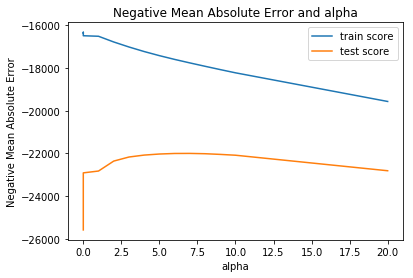

In [86]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [87]:
# Getting the best value of Alpha:
model_cv_ridge.best_params_

{'alpha': 7.0}

In [88]:
alpha = 7

# Instantiating Ridge regressor with the value of Alpha:
ridge = Ridge(alpha=alpha)

# Fitting the model
X_train_ridge = X_train[cols_used]
ridge.fit(X_train_ridge, y_train)

Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
# Getting the summary of Ridge Regression model on the training set:
pd.DataFrame({'Feature' : cols_used, 'Coefficient' :ridge.coef_})

,Feature,Coefficient
0,LotArea,41152.429095
1,BsmtUnfSF,-19958.441676
2,1stFlrSF,99027.427472
3,2ndFlrSF,57482.723282
4,FullBath,59016.081725
5,KitchenAbvGr,-38821.859906
6,GarageCars,53173.567323
7,GarageArea,23528.661629
8,LotShape_IR3,-8793.907367
9,Neighborhood_NoRidge,55880.907038


In [90]:
# Predicting on the test dataset:
X_test_ridge = X_test[cols_used]
y_test_pred_ridge = ridge.predict(X_test_ridge)
y_test_pred_ridge[:5]

array([146733.40083095, 126293.74029811, 178677.89968234, 139307.76808095,
       248409.92162426])

In [91]:
# Getting the R2 score of Ridge Regression:

# Train R2 score:
r2_score_train_ridge = r2_score(y_true=y_train, y_pred=ridge.predict(X_train_ridge))
print(r2_score_train_ridge)

# Test R2 score:
r2_score_test_ridge = r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
print(r2_score_test_ridge)

0.7982189569126036
0.7858290519410294


We can see that the test score has improved significantly by using Ridge Regression.<br>
Final score for Ridge Regression:<br>
- R2 Train = 0.80
- R2 Test = 0.78

## Lasso Regression:
### Finding the optimal value of Alpha / Lambda

In [92]:
# Instantiating the Lasso Regressor:
lasso = Lasso()

# List of param values:
params_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 
                          3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15, 20, 25, 30, 40, 50, 100, 110, 120,
                          130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290,
                          300, 350, 400, 500, 600, 700, 800, 900, 1000]}


# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits


[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed:   11.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15, 20, 25, 30, 40, 50, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 350, 400, 500, 600, 700, 800, 900, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [93]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092557,0.013863,0.000453,0.000004,0.0001,{'alpha': 0.0001},-25542.943479,-25484.702895,-24184.540128,-25355.348815,...,-25519.381086,904.492299,58,-17401.445173,-17605.028729,-16633.669980,-13840.751780,-16307.349952,-16357.649123,1346.027922
1,0.082918,0.006408,0.000450,0.000008,0.001,{'alpha': 0.001},-25542.664501,-25484.307737,-24184.640451,-25354.193635,...,-25518.985587,904.423284,57,-17401.419444,-17605.008386,-16633.654544,-13840.744816,-16307.334294,-16357.632297,1346.022249
2,0.086183,0.008602,0.000512,0.000053,0.01,{'alpha': 0.01},-25539.875446,-25480.591884,-24193.401373,-25343.759522,...,-25516.856988,901.425285,56,-17401.231645,-17604.848838,-16633.521926,-13840.690848,-16307.209083,-16357.500468,1345.979231
3,0.081886,0.006396,0.000447,0.000015,0.05,{'alpha': 0.05},-25527.607390,-25467.049640,-24205.522181,-25366.149305,...,-25516.426428,893.504136,55,-17400.535976,-17604.186228,-16632.804493,-13840.445496,-16306.917366,-16356.977912,1345.813046
4,0.104191,0.024719,0.000513,0.000070,0.1,{'alpha': 0.1},-25512.430246,-25453.390806,-24225.975043,-25360.057030,...,-25510.729312,883.160063,54,-17399.675137,-17603.360493,-16632.064218,-13840.137618,-16306.587151,-16356.364923,1345.613758


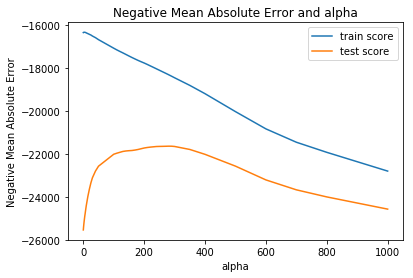

In [94]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [95]:
# Getting the best value of Alpha:
model_cv_lasso.best_params_

{'alpha': 280}

In [96]:
alpha = 280

lasso = Lasso(alpha=280)

# Fitting the model
X_train_lasso = X_train[cols_used]
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=280, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
lasso_coef = pd.DataFrame({'Feature':X_train_lasso.columns, 'Lasso_Coefficient':lasso.coef_})
lasso_coef['Coefficient'] = round(lasso_coef['Lasso_Coefficient'], 2)
lasso_coef.drop('Lasso_Coefficient', axis='columns', inplace=True)
lasso_coef.head()

,Feature,Coefficient
0,LotArea,7570.34
1,BsmtUnfSF,-24892.17
2,1stFlrSF,247801.31
3,2ndFlrSF,87532.82
4,FullBath,43784.91


In [98]:
lasso_coef

,Feature,Coefficient
0,LotArea,7570.34
1,BsmtUnfSF,-24892.17
2,1stFlrSF,247801.31
3,2ndFlrSF,87532.82
4,FullBath,43784.91
5,KitchenAbvGr,-57842.90
6,GarageCars,56711.07
7,GarageArea,0.00
8,LotShape_IR3,-0.00
9,Neighborhood_NoRidge,53242.06


In [99]:
# Calculating the R2 score for Train and Test data using Lasso regression model.

X_test_lasso = X_test[cols_used]

y_test_pred_lasso = lasso.predict(X_test_lasso)
y_train_pred_lasso = lasso.predict(X_train_lasso)

r2_score_train_lasso = r2_score(y_true=y_train, y_pred=y_train_pred_lasso)
r2_score_test_lasso = r2_score(y_true=y_test, y_pred=y_test_pred_lasso)

print(r2_score_train_lasso)
print(r2_score_test_lasso)

0.8184269731232703
0.7987563821274627


The R2 for Lasso Regression comes out to be:<br>
- R2 train = 0.82
- R2 test = 0.80

## Conclusion:
A quick glance at the final train and test scores of the three methods used is as follows:<br><br>
1.**Simple Linear Regression**:
- Train R2 = 0.84<br>
- Test R2 = 0.73<br>

2.**Ridge Regression**:
- Train R2 = 0.80<br>
- Test R2 = 0.78

3.**Lasso Regression**:
- Train R2 = 0.82<br>
- Test R2 = 0.80<br>

It is clear from the above scores that Lasso Regression has the best performance with the same number of features in the model.